# Clase 11 - Ajuste de mínimos cuadrados

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.style.use('seaborn-poster')

Generemos un conjunto de datos con una distribución aleatoria en torno a $y=a+bx$ con $a=0.5$ y $b=1.0$.

In [3]:
npts = 30
a = 0.5
b = 1.0
np.random.seed(130)
x = np.random.uniform(0.0, 10.0, npts)
y = a + b*x
yunc = np.absolute(np.random.normal(0.5, 0.5, npts))
y = y + np.random.normal(0.0, yunc, npts)

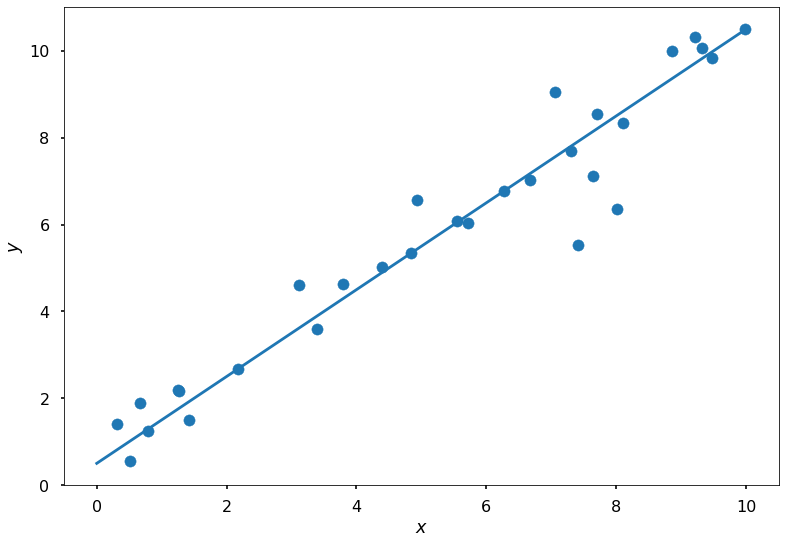

In [4]:
x1 = np.linspace(0,10,100)
func1 = a + b*x1
plt.scatter(x,y)
plt.plot(x1,func1)
plt.xlabel('$x$')
plt.ylabel('$y$');

Definamos la función de ajuste lineal dada por $f(x)=a+bx$ con

\begin{equation*}
b=\frac{\sum y_{i}\left(x_{i}-\bar{x}\right)}{\sum x_{i}\left(x_{i}-\bar{x}\right)} \qquad a=\bar{y}-\bar{x} b
\end{equation*}

donde

\begin{equation*}
\bar{x}=\frac{1}{n+1} \sum_{i=0}^{n} x_{i} \qquad \bar{y}=\frac{1}{n+1} \sum_{i=0}^{n} y_{i}
\end{equation*}

son los valores promedio de los datos $x$ e $y$.

In [5]:
def linear_fit(x,y):
    xprom = np.average(x)
    yprom = np.average(y)
    n = len(x)
    
    s1 = s2 = 0
    for i in range(0,n):
        s1 = s1 + x[i]*(x[i] - xprom)
        s2 = s2 + y[i]*(x[i] - xprom)
    
    b = s2/s1
    a = yprom - xprom*b
    
    return (a,b)

In [6]:
af,bf = linear_fit(x,y)

In [7]:
print ('coeficientes de ajuste lineal =',af,bf)

coeficientes de ajuste lineal = 0.7749739322574438 0.9503502826042171


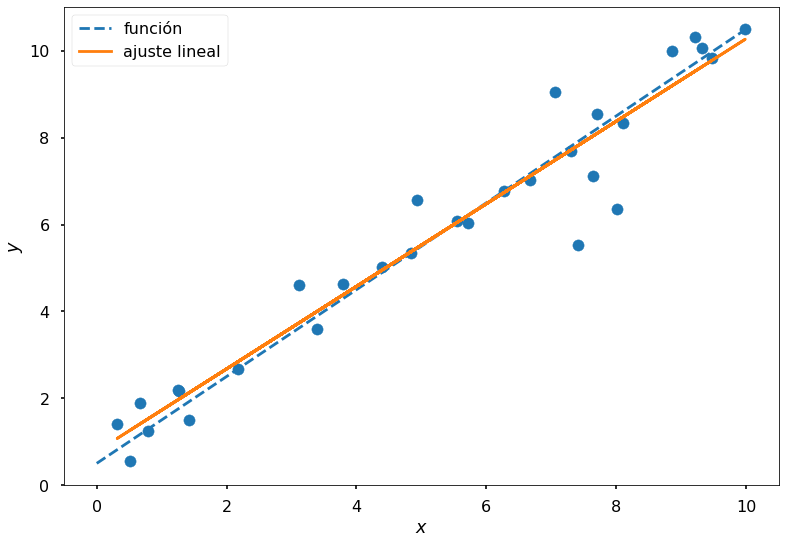

In [8]:
fit = af + bf*x
plt.scatter(x,y)
plt.plot(x1,func1,ls='--',label='función')
plt.plot(x,fit,label='ajuste lineal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

Definamos ahora una función de ajuste 

\begin{equation*}
f(x)=\sum_{j=0}^{m} a_{j} x^j
\end{equation*}

entonces los coeficientes $a_j$ están dados por el sistema de ecuaciones lineales $A\vec{a}=\vec{b}$ con

\begin{equation*}
A_{k j}=\sum_{i=0}^{n} x_{i}^{j+k} \quad b_{k}=\sum_{i=0}^{n} x_{i}^{k} y_{i}
\end{equation*}

In [9]:
def polinomial_fit(x,y,m):
    n = len(x)
    b = np.zeros(m+1)
    A = np.zeros((m+1,m+1))
    s = np.zeros(2*m+1)
    
    for i in range(0,n):
        temp = y[i]
        for k in range(0,m+1):
            b[k] = b[k] + temp
            temp = temp*x[i]
        temp = 1.0
        for j in range(0,2*m+1):
            s[j] = s[j] + temp
            temp = temp*x[i]
    
    for j in range(0,m+1):
        for k in range(0,m+1):
            A[j,k] = s[j+k]
    
    return (np.linalg.solve(A,b))

In [10]:
a2,b2 = polinomial_fit(x,y,1)

In [11]:
print ('coeficientes de ajuste lineal =',a2,b2)

coeficientes de ajuste lineal = 0.7749739322574458 0.9503502826042167


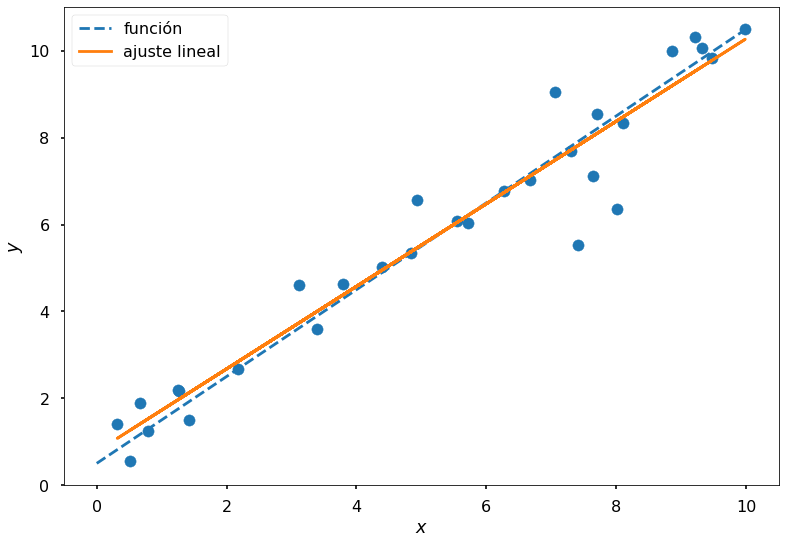

In [12]:
fit2 = a2 + b2*x
plt.scatter(x,y)
plt.plot(x1,func1,ls='--',label='función')
plt.plot(x,fit2,label='ajuste lineal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

Ahora generemos un conjunto de datos con una distribución aleatoria en torno a $y=a+bx+cx^2+dx^3$ con $a=0.5$, $b=-0.4$, $c=1.0$ y $d=1.2$.

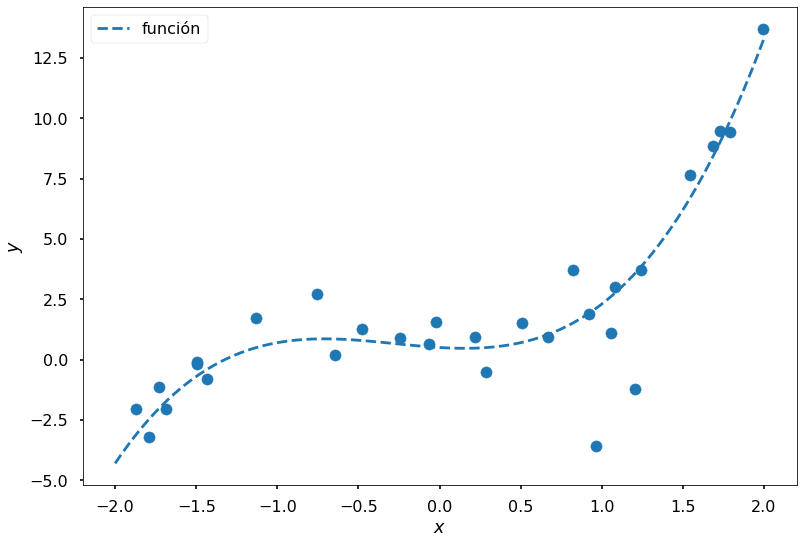

In [13]:
npts = 30
a = 0.5
b = -0.4
c = 1.0
d = 1.2
np.random.seed(130)
x = np.random.uniform(-2,2.0, npts)
y = a + b*x + c*x**2 + d*x**3
yunc = np.absolute(np.random.normal(0.5, 1.5, npts))
y = y + np.random.normal(0.0, yunc, npts)
plt.scatter(x,y)
x1 = np.linspace(-2,2,100)
func1 = a + b*x1 + c*x1**2 + d*x1**3
plt.plot(x1,func1,ls='--',label='función')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

Ajustemos un polinomio de grado 3

In [14]:
a3,b3,c3,d3 = polinomial_fit(x,y,3)

In [15]:
print ('coeficientes de ajuste =',a3,b3,c3,d3)

coeficientes de ajuste = 0.5579412293299764 -1.6942795196009017 0.9913608610066831 1.6016723092692815


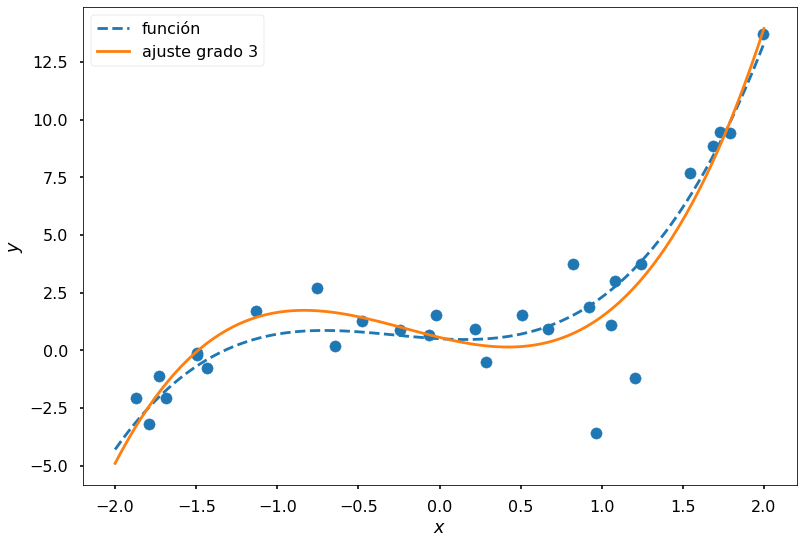

In [16]:
plt.scatter(x,y)
fit3 = a3 + b3*x1 + c3*x1**2 + d3*x1**3
plt.plot(x1,func1,ls='--',label='función')
plt.plot(x1,fit3,label='ajuste grado 3')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

Ahora ajustemos un polinomio de grado 4

In [17]:
a4,b4,c4,d4,e4 = polinomial_fit(x,y,4)

In [18]:
print ('coeficientes de ajuste =',a4,b4,c4,d4,e4)

coeficientes de ajuste = 0.8629384346263934 -1.521793230514035 0.21786377504824975 1.5301352725787072 0.22541920307305716


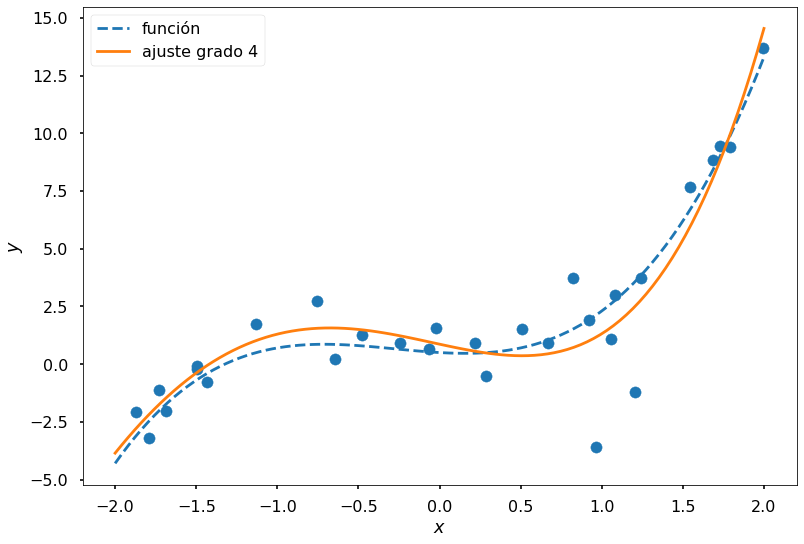

In [19]:
plt.scatter(x,y)
fit4 = a4 + b4*x1 + c4*x1**2 + d4*x1**3 + e4*x1**4
plt.plot(x1,func1,ls='--',label='función')
plt.plot(x1,fit4,label='ajuste grado 4')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

Comparemos con la rutina ${\bf polyfit}$ de $\textit{numpy}$

In [20]:
e5,d5,c5,b5,a5 = np.polyfit(x,y,4)

In [21]:
print (a5,b5,c5,d5,e5)

0.8629384346263904 -1.5217932305140403 0.21786377504825638 1.530135272578709 0.22541920307305544


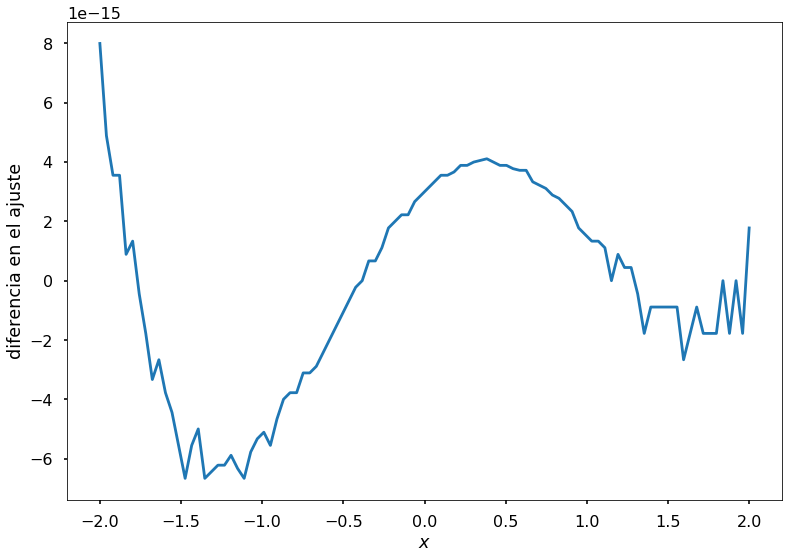

In [22]:
fit5 = a5 + b5*x1 + c5*x1**2 + d5*x1**3 + e5*x1**4
plt.plot(x1,fit4-fit5)
plt.xlabel('$x$')
plt.ylabel('diferencia en el ajuste');